In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import utils as u

In [5]:
hist_file = "thodi/Karuna Nidhi Illalo/Karuna Nidhi Illalo.multitrack-violin-alaapana-histogram.txt"
bin_centers, hist = np.loadtxt(hist_file, unpack=True)

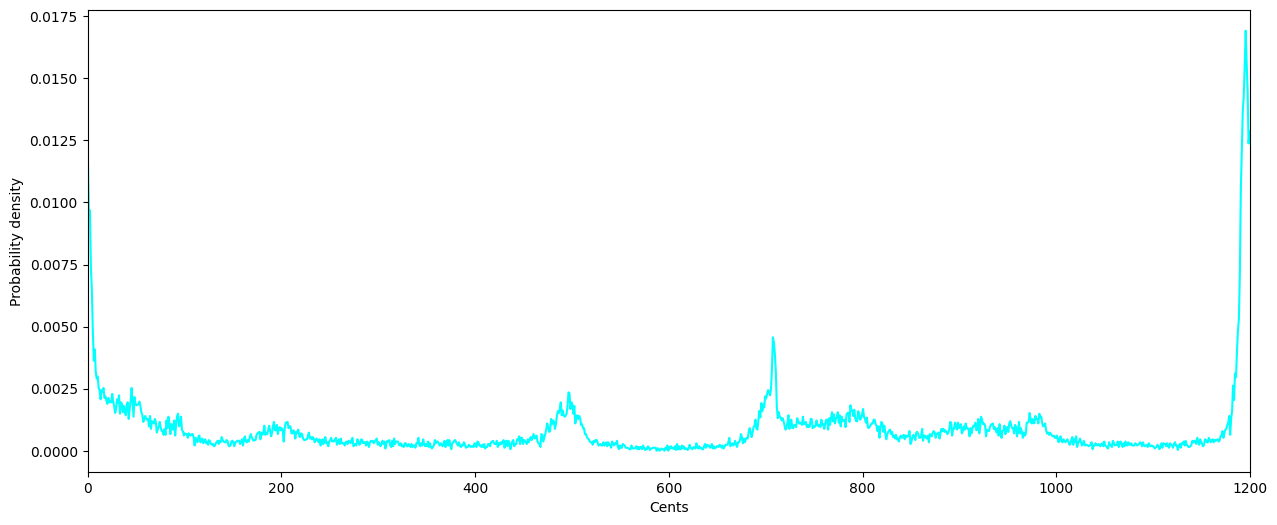

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(bin_centers, hist, color = "cyan")
plt.xlabel("Cents")
plt.ylabel("Probability density")
plt.xlim(0, 1200)
# plt.title("Pitch histogram \n" + piece + " (" + raga + ") - " + instrument + " - " + section)
plt.show()   